# Effect of Different Initialization Methods

## 1. Introduction

Training neural network requires specifying an initial value of the weights. A well chosen initialization method will help learning.  

In this notebook, we will see how different initializations (random normal distribution, and He initialization) lead to different results. 

A well chosen initialization can:
- Speed up the convergence of gradient descent
- Increase the odds of gradient descent converging to a lower training (and generalization) error 

## 2. Import Packages and Set Default Parameters

- util_func provides some necessary functions for the calculations, e.g., Sigmoid, RELU.
- deep_neural_network.py provides the functions to construct deep neural network

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")
import numpy as np
from deep_neural_network import *
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets

plt.rcParams['figure.figsize'] = (7.0, 4.0) 
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray' # set colormap

In [2]:
np.random.seed(20)

## 3. Data Set

In [3]:
# dataset: make a large circle containing a smaller circle in 2d.

def load_makecircles_dataset():
    
    train_x, train_y = sklearn.datasets.make_circles(n_samples = 300, noise = 0.05) # training set
    test_x, test_y = sklearn.datasets.make_circles(n_samples = 100, noise = 0.05) # test set
    
    plt.scatter(train_x[:, 0], train_x[:, 1], c = train_y, s = 40, cmap = plt.cm.Spectral)
    plt.title("training set")
    
    # convert the data to proper shape
    train_x = train_x.T
    train_y = train_y.reshape((1, train_y.shape[0]))
    test_x = test_x.T
    test_y = test_y.reshape((1, test_y.shape[0]))
    
    return train_x, train_y, test_x, test_y

Total number of training examples: 300
Total number of test examples: 100
train_x shape: (2, 300)
train_y shape: (1, 300)
test_x shape: (2, 100)
test_y shape: (1, 100)
Example of y values: [1 1 0 1 0 1 0 1 0 0]


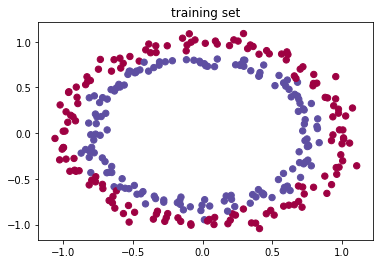

In [4]:
train_x, train_y, test_x, test_y = load_makecircles_dataset()
print("Total number of training examples: " + str(train_x.shape[1]))
print("Total number of test examples: " + str(test_x.shape[1]))
print("train_x shape: " + str(train_x.shape))
print("train_y shape: " + str(train_y.shape))
print("test_x shape: " + str(test_x.shape))
print("test_y shape: " + str(test_y.shape))
print("Example of y values: " + str(train_y[0, 0:10]))


## 4. Some Useful Functions

In [5]:
# use the trained params to predict the output

def predict(params, X):
    """
    Arguments: 
    X: input features
    params: trained weight matrices and bias vectors of the neural network
    
    Returns:
    predicted labels for X, with the shape of (1, number of examples)
    """
    Aout, _ = L_layer_forward(X, params)
    m = X.shape[1] # number of examples
    Aout.reshape(1, m)
    Aout = (Aout > 0.5)
    
    return Aout

In [6]:
# print the accuracy

def accuracy(params, X, Y):
    """
    Arguments:
    X: input features
    params: trained weight matrices and bias vectors of the neural network
    Y: true labels
    """
    Aout = predict(params, X)
    m = X.shape[1]
    print("Accuracy: " + str(np.sum(Aout == Y) / m))

In [7]:
# plot the decision boundary contour

def plot_dicision_boundary(model, X, Y):
    """
    Arguments:
    model: the function that inputs X and outputs the predicted labels.
    X: the input features
    Y: the true labels
    """
    # set min and max values and give some padding
    x1_min, x1_max = min(X[0, :]) - 1, max(X[0, :]) + 1
    x2_min, x2_max = min(X[1, :]) - 1, max(X[1, :]) + 1
    h = 0.01 # interval of the grid
    
    x1, x2 = np.meshgrid(np.arange(x1_min, x1_max, h), np.arange(x2_min, x2_max, h))
    # flatten x1 and x2 to 1-D arrays, concatenate along second axis, and transpose
    Z = model(np.c_[x1.ravel(), x2.ravel()].T) # Z.shape = (1, total number of grid points)
    Z = Z.reshape(x1.shape)

    # plot the contour  
    plt.contourf(x1, x2, Z, cmap = plt.cm.Spectral)
    plt.scatter(X[0, :], X[1, :], c = Y[0, :], s = 40, cmap = plt.cm.Spectral)
    plt.show()

## 5. Random Initialization

Set weight matrices to random values following standard normal distribution.

### 5.1 Model Training

Set params['W' + str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1]) * 10 in deep_neural_network.py

current iteration: 1, cost: inf
current iteration: 5000, cost: 0.5313345951096806
current iteration: 10000, cost: 0.5309626422074155
current iteration: 15000, cost: 0.5308041850528132
current iteration: 20000, cost: 0.5306922261648953
current iteration: 25000, cost: 0.5275040956001885


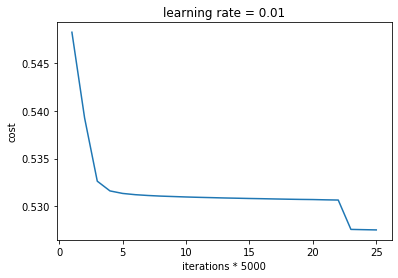

In [8]:
layer_dims = [train_x.shape[0], 10, 5, 1] # number of units in each layer, including the input and output layers
# train the neural network
params_rand_init = L_layer_model(train_x, train_y, layer_dims, learning_rate = 0.01, iterations = 25000, 
                                 print_cost_freq = 5000, save_cost_freq = 1000, initialization = "random_normal")

In [9]:
print("For the training set:")
accuracy(params_rand_init, train_x, train_y)
print("For the test set:")
accuracy(params_rand_init, test_x, test_y)

For the training set:
Accuracy: 0.63
For the test set:
Accuracy: 0.59


### 5.2. Result Analysis

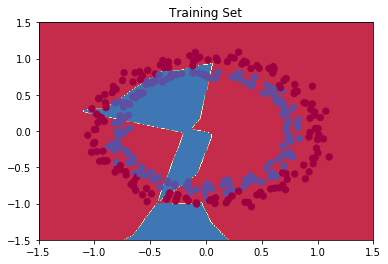

In [10]:
# plot the decision boundary for the training set

axes = plt.gca()
axes.set_xlim([-1.5,1.5])
axes.set_ylim([-1.5,1.5])
plt.title("Training Set")
plot_dicision_boundary(lambda x : predict(params_rand_init, x), train_x, train_y)

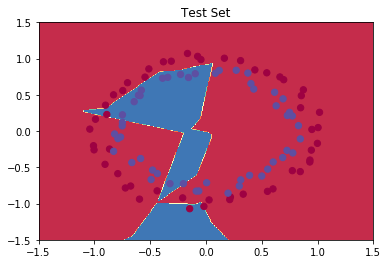

In [11]:
# plot the decision boundary for the test set

axes = plt.gca()
axes.set_xlim([-1.5,1.5])
axes.set_ylim([-1.5,1.5])
plt.title("Test Set")
plot_dicision_boundary(lambda x : predict(params_rand_init, x), test_x, test_y)

**Note** that If we use "random_normal" initialization, we can tune the factor, and we find that params['W' + str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1]) * 1.0 gives the best result.

## 6. "HE" Initialization

### 6.1 Model Training

Set params['W' + str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1]) * np.sqrt(2 / layer_dims[l-1]) in deep_neural_network.py

current iteration: 1, cost: 0.7023331991177456
current iteration: 5000, cost: 0.6852563590193823
current iteration: 10000, cost: 0.6715161681407267
current iteration: 15000, cost: 0.5875845905330312
current iteration: 20000, cost: 0.21132503139022032
current iteration: 25000, cost: 0.10201128914427847


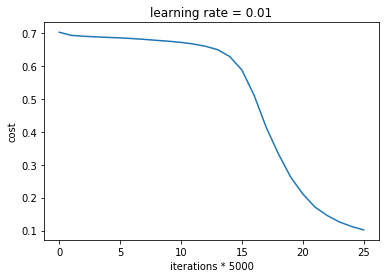

In [12]:
layer_dims = [train_x.shape[0], 10, 5, 1] # number of units in each layer, including the input and output layers
# train the neural network
params_he_init = L_layer_model(train_x, train_y, layer_dims, learning_rate = 0.01, iterations = 25000, 
                               print_cost_freq = 5000, save_cost_freq = 1000, initialization = "he")

In [13]:
print("For the training set:")
accuracy(params_he_init, train_x, train_y)
print("For the test set:")
accuracy(params_he_init, test_x, test_y)

For the training set:
Accuracy: 0.9866666666666667
For the test set:
Accuracy: 0.98


### 6.2. Result Analysis

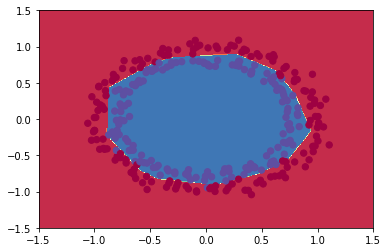

In [14]:
# plot the decision boundary for the training set

axes = plt.gca()
axes.set_xlim([-1.5,1.5])
axes.set_ylim([-1.5,1.5])
plot_dicision_boundary(lambda x : predict(params_he_init, x), train_x, train_y)

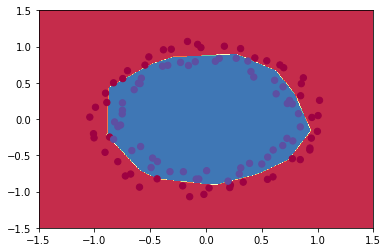

In [15]:
# plot the decision boundary for the test set

axes = plt.gca()
axes.set_xlim([-1.5,1.5])
axes.set_ylim([-1.5,1.5])
plot_dicision_boundary(lambda x : predict(params_he_init, x), test_x, test_y)

As we can see, with the same number of iterations and learning rate, He initialization yields much better results.